# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


In [2]:
image_size = (128,512)

***

In [3]:
from pypiv import Particle, Image, FlowField

particles = Particle(1, 
                     size=image_size, 
                     diameters=(6,10),
                     distances=(1,2),
                     densities=(0.01,0.05),
                     signal_to_noise=(5,20),
                     diameter_std=1,
                     seeding_mode='random', 
                     random_seed=None)

In [4]:
image = Image(size=image_size, 
              random_seed=100)

In [5]:
image.add_particles(particles)

Particles added to the image.


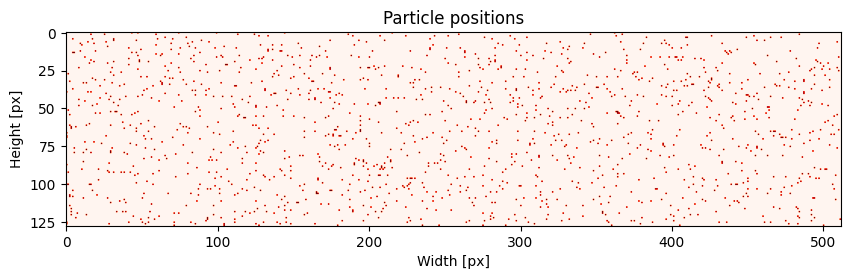

In [6]:
image.plot(0, 
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Reds',
           figsize=(10,8), 
           filename='particle-positions.png');

In [7]:
image.add_reflected_light(exposures=(0.02,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.3,
                          alpha=1/20)

Reflected light added to the image.


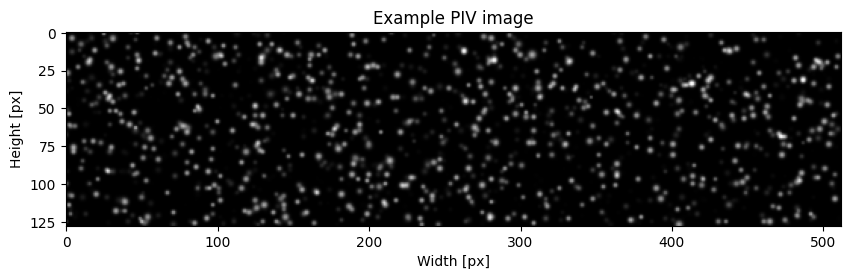

In [8]:
image.plot(0, 
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=(10,8), 
           filename='example-image.png');

In [9]:
flowfield = FlowField(10,
                      size=(128,512),
                      flow_mode='random',
                      gaussian_filters=(8,10),
                      n_gaussian_filter_iter=10,
                      sin_period=(30,300),
                      displacement=(0,10),
                      percentage_of_lost_particles=10, 
                      random_seed=100)

In [10]:
image.add_velocity_field(flowfield)

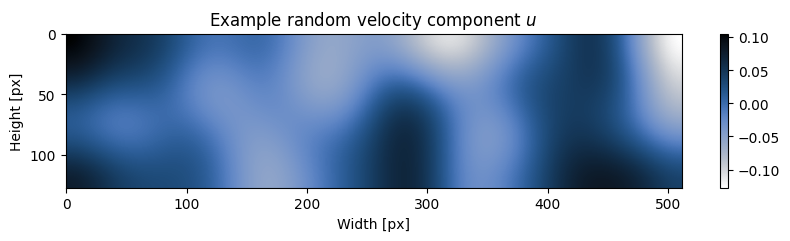

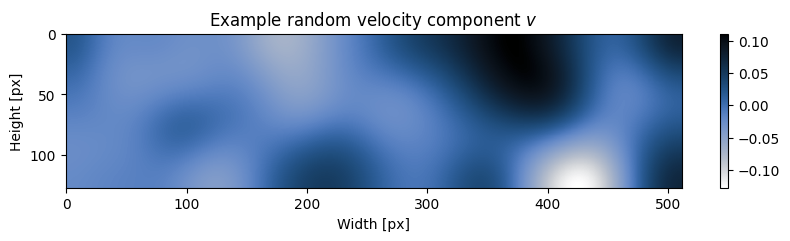

In [11]:
image.plot_velocity_field(0,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          figsize=(10,2),
                          filename='example-random-velocity-field.png');

***